# Pymaceuticals Inc.
---

### Analysis

- The summary statistics of the combined files show that Capomulin and Ramicane have the lowest average tumor size with Ketapril having the highest average size.
- The study shows the population grouping between male and female to be 51% to 49% respectively.
- The bar charts indicate that Capomulin had the highest number of mice for the test at 230 with Ramicane close behind at 228. Propriva had the lowest number of mice submitted to the test.
- The correlation between mouse weight and average tumor volume is 0.84 which shows a strong positive correlation. The greater the weight of the mouse, the greater the tumor volume.
- Based on this data, Capomulin is the most effective treatment to reduce tumor size with Ramicane in second.

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [78]:
# Checking the number of mice.
mice_num = combined_df["Mouse ID"].nunique()
mice_num

249

In [79]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [80]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
dupe_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [81]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"].isin(duplicate_mice_id)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [82]:
# Checking the number of mice in the clean DataFrame.
clean_mice_num = clean_df["Mouse ID"].nunique()
clean_mice_num

248

## Summary Statistics

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
var = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()


# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume": mean,
                                  "Median Tumor VOlume": median,
                                  "Tumor Volume Variance": var,
                                  "Tumor Volume Std. Dev.": std,
                                  "Tumor Volume Std. Err": sem})

summary_statistics


,Mean Tumor Volume,Median Tumor VOlume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [84]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
sum_agg = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])

sum_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [85]:
# Generate a bar plot showing the total number of rows for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

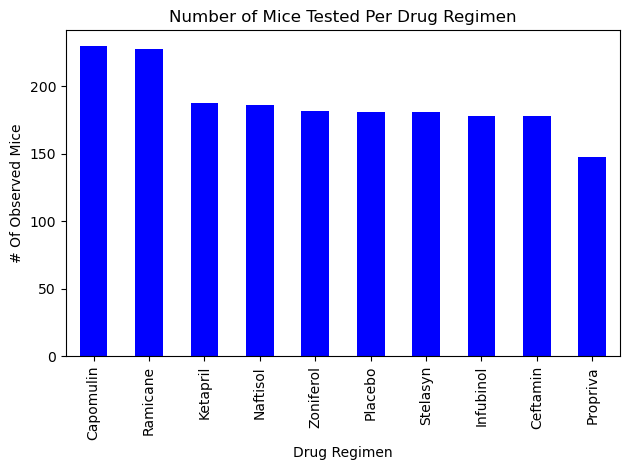

In [86]:
# Create a bar chart
bar_chart = mice_count.plot.bar(color="b")

# Set plot title, xlabel, and ylabel
plt.title("Number of Mice Tested Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Observed Mice")

# Ensure the layout is tight
plt.tight_layout()

# Display the plot
plt.show()

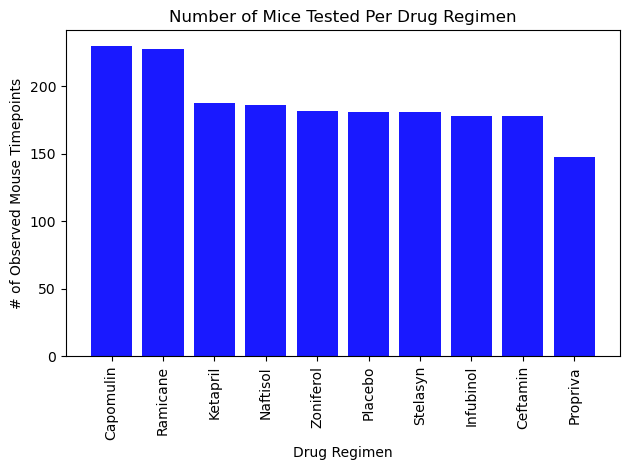

In [87]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='b', alpha=0.9, align='center')

plt.title("Number of Mice Tested Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [88]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


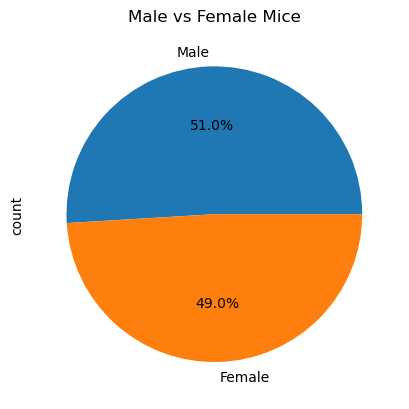

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_df["Sex"].value_counts()

# Set the title
plt.title("Male vs Female Mice")

# Create the pie chart with a percentage format
mice_gender.plot.pie(autopct="%1.1f%%")

# Show the plot
plt.show()

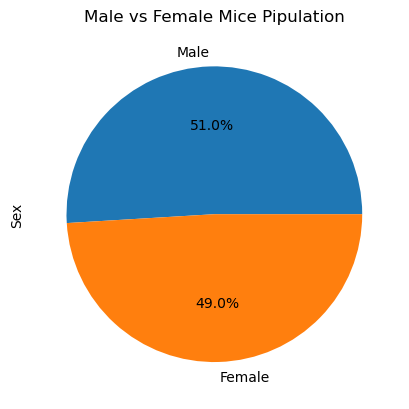

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [50, 50]
plot = mice_gender.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.title("Male vs Female Mice Pipulation")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_last = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_last = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_last = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]

In [92]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Capomulin
capomulin_tvol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_tvol, clean_df, on=("Mouse ID", "Timepoint"), how="left")
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [93]:
# Determine Statistics for Capomulin Tumors
capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_quartiles = capomulin_tumors.quantile([.25, .5, .75])
capomulin_lowerq = quartiles[0.25]
capomulin_upperq = quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq

print(f"The lower quartile of Capomulin tumors: {capomulin_lowerq}")
print(f"The upper quartile of Capomulin tumors: {capomulin_upperq}")
print(f"The interquartile range of Capomulin tumors: {capomulin_iqr}")

# Determine outliers using upper and lower bounds
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

print(f"Values below {capomulin_lower_bound} could be outliers.")
print(f"Values above {capomulin_upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 48.72
The upper quartile of Capomulin tumors: 64.3
The interquartile range of Capomulin tumors: 15.579999999999998
Values below 25.35 could be outliers.
Values above 87.66999999999999 could be outliers.


In [94]:
# Ramicane
ramicane_tvol=pd.DataFrame(ramicane_last)
ramicane_merge=pd.merge(ramicane_tvol, clean_df, on=("Mouse ID", "Timepoint"), how="left")
ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [95]:
# Determine Statistics for Ramicane Tumors
ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ramicane_quartiles = ramicane_tumors.quantile([.25, .5, .75])
ramicane_lowerq = quartiles[.25]
ramicane_upperq = quartiles[.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq

print(f"The lower quartile of Ramicane tumors: {ramicane_lowerq}")
print(f"The upper quartile of Ramicane tumors: {ramicane_upperq}")
print(f"The interquartile range of Ramicane tumors: {ramicane_iqr}")

# Determine outliers using upper and lower bounds
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

print(f"Values below {ramicane_lower_bound} could be outliers.")
print(f"Values above {ramicane_upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 48.72
The upper quartile of Ramicane tumors: 64.3
The interquartile range of Ramicane tumors: 15.579999999999998
Values below 25.35 could be outliers.
Values above 87.66999999999999 could be outliers.


In [96]:
# Infubinol
infubinol_tvol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_tvol, clean_df, on=("Mouse ID", "Timepoint"), how="left")
infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [97]:
# Determine Statistics for Infubinol Tumors
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
infubinol_quartiles = infubinol_tumors.quantile([.25, .5, .75])
infubinol_lowerq = quartiles[.25]
infubinol_upperq = quartiles[.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq

print(f"The lower quartile of Infubinol tumors: {infubinol_lowerq}")
print(f"The upper quartile of Infubinol tumors: {infubinol_upperq}")
print(f"The interquartile range of Infubinol tumors: {infubinol_iqr}")

# Determine outliers using upper and lower bounds
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

print(f"Values below {infubinol_lower_bound} could be outliers.")
print(f"Values above {infubinol_upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 48.72
The upper quartile of Infubinol tumors: 64.3
The interquartile range of Infubinol tumors: 15.579999999999998
Values below 25.35 could be outliers.
Values above 87.66999999999999 could be outliers.


In [98]:
# Ceftamin
ceftamin_tvol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_tvol, clean_df, on=("Mouse ID", "Timepoint"), how="left")
ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [99]:
# Determine Statistics for Ceftamin Tumors
# Create empty list to fill with tumor vol data (for plotting)
ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ceftamin_quartiles = ceftamin_tumors.quantile([.25, .5, .75])
ceftamin_lowerq = quartiles[.25]
ceftamin_upperq = quartiles[.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq

print(f"The lower quartile of Ceftamin tumors: {ceftamin_lowerq}")
print(f"The upper quartile of Ceftamin tumors: {ceftamin_upperq}")
print(f"The interquartile range of Ceftamin tumors: {ceftamin_iqr}")

# Determine outliers using upper and lower bounds
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

print(f"Values below {ceftamin_lower_bound} could be outliers.")
print(f"Values above {ceftamin_upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72
The upper quartile of Ceftamin tumors: 64.3
The interquartile range of Ceftamin tumors: 15.579999999999998
Values below 25.35 could be outliers.
Values above 87.66999999999999 could be outliers.


In [100]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = clean_df[clean_df["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [101]:
last_time = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

last_time = last_time.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [102]:
# Create empty list to fill with tumor vol data (for plotting)
treatment = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    quartiles = last_time[drug].quantile([.25, .5, .75]).round(2)
    lowerq = quartiles[.25].round(2)
    upperq = quartiles[.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    if treatment == 0:
        print(f"----------------------------------------------")
    print(f"The lower quantile of {drug} treatment is: {lowerq}")
    print(f"The upper quantile of {drug} treatment is: {upperq}")
    print(f"The interquartile range of {drug} treatment is: {iqr}")
    
    # Determine outliers using upper and lower bounds
    print(f"Values below {lower_bound} could be outliers for {drug}.")
    print(f"Values above {upper_bound} could be ooutliers for {drug}.")
    print(f"----------------------------------------------")
    treatment+=1

----------------------------------------------
The lower quantile of Capomulin treatment is: 32.38
The upper quantile of Capomulin treatment is: 40.16
The interquartile range of Capomulin treatment is: 7.78
Values below 20.71 could be outliers for Capomulin.
Values above 51.83 could be ooutliers for Capomulin.
----------------------------------------------
The lower quantile of Ramicane treatment is: 31.56
The upper quantile of Ramicane treatment is: 40.66
The interquartile range of Ramicane treatment is: 9.1
Values below 17.91 could be outliers for Ramicane.
Values above 54.31 could be ooutliers for Ramicane.
----------------------------------------------
The lower quantile of Infubinol treatment is: 54.05
The upper quantile of Infubinol treatment is: 65.53
The interquartile range of Infubinol treatment is: 11.48
Values below 36.83 could be outliers for Infubinol.
Values above 82.75 could be ooutliers for Infubinol.
----------------------------------------------
The lower quantile of 

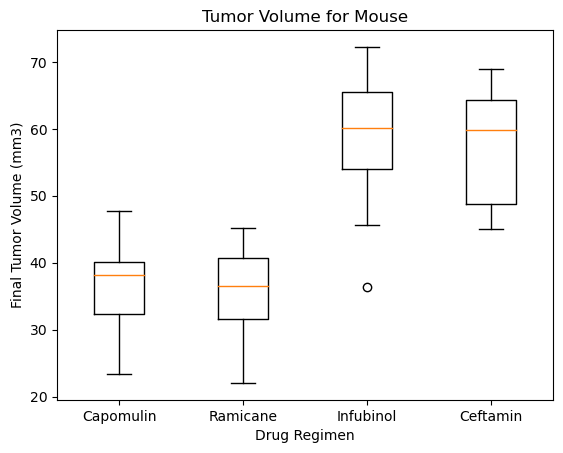

In [103]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume for Mouse")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(data_plot, labels=regimen, widths=0.4, vert=True)
plt.show()

## Line and Scatter Plots

In [110]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509", :]
line_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


Text(0, 0.5, 'Tumor Volume (mm3)')

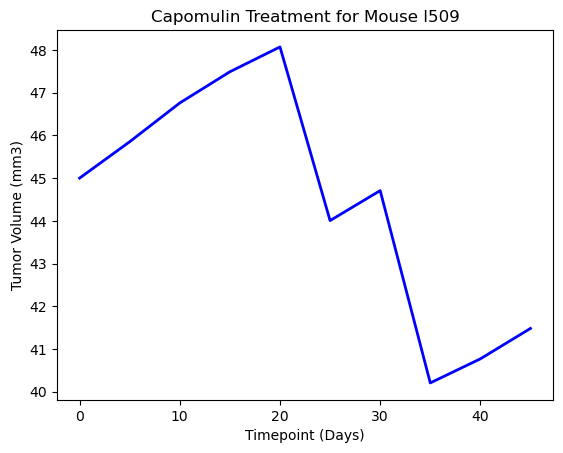

In [105]:
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]

fi1, ax1 = plt.subplots()
plt.title("Capomulin Treatment for Mouse l509")
plt.plot(x_axis, y_axis, linewidth=2, color="blue", label="Fahrenheit")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

In [106]:
average_capomulin_volume = capomulin_df.groupby(["Mouse ID"]).mean(["Weight (g)"])
average_capomulin_volume.head(10)

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


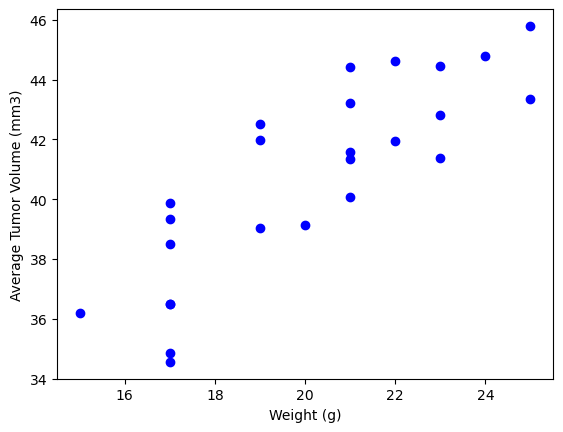

In [107]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
average_capomulin_volume = capomulin_df.groupby(["Mouse ID"]).mean(["Weight (g)"])

marker_size = 15
plt.scatter(average_capomulin_volume["Weight (g)"], average_capomulin_volume["Tumor Volume (mm3)"], color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [108]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coef = st.pearsonr(average_capomulin_volume["Weight (g)"], average_capomulin_volume["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation_coef[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


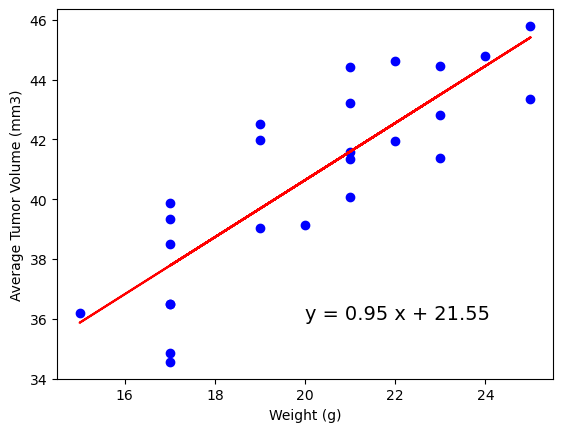

In [109]:
# Plot the linear regression equation after calculating the correlation coefficient
(slope, intercept, rvalue, pvalue, stderr) = linregress(average_capomulin_volume["Weight (g)"], 
                                                        average_capomulin_volume["Tumor Volume (mm3)"])
regress_values = average_capomulin_volume["Weight (g)"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept,2)}"

marker_size = 15
plt.scatter(average_capomulin_volume["Weight (g)"], average_capomulin_volume["Tumor Volume (mm3)"], color="blue")
plt.plot(average_capomulin_volume["Weight (g)"], regress_values, color = "red")
plt.annotate(line_eq, (20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()